#### UFRJ - Universidade Federal do Rio de Janeiro
#### IM   - Instituto de Matemática
#### DMA  - Departamento de Matemática Aplicada
#### TMAA - Top. Mat. Aplicada A - Programação I

###  ED04 - Perfil do Eleitorado 2018
### ALUNA: Jackeline Carvalho - DRE: 116043481
### Data de entrega: 18 de julho de 2018

##### Considerando o seguinte caso hipotético: Você foi recentemente contratado por uma grande empresa de análise de dados e chefe da sua equipe lhe pediu para terminar um programa para produzir gráficos de barra do “Perfil do Eleitorado com base nos dados produzido pelo TSE”. O programa deve apresentar três gráficos de barra com o perfil do eleitorado por UF, por Faixa Etária e por Escolaridade

In [136]:
#Importando as bibliotecas que serão usadas:
import numpy as np
import pandas as pd
import math

####  Leitura do arquivo  com os dados do perfil eleitorado:


In [143]:
#Lendo o arquivo:
cabecalho = ['ANO', 'UF', 'CIDADE', 'ZONA', 'SECAO', 'SEXO', 'FAIXA_ETARIA', 'GRAU_DE_INSTRUCAO', 'QNT_ELEITORES']
perfil_eleitorado = pd.read_csv('perfil_eleitorado_ATUAL.txt',delimiter=';', encoding = 'latin-1', names = cabecalho)

In [144]:
#verificando as colunas que existem na tabela:
perfil_eleitorado.columns

Index(['ANO', 'UF', 'CIDADE', 'ZONA', 'SECAO', 'SEXO', 'FAIXA_ETARIA',
       'GRAU_DE_INSTRUCAO', 'QNT_ELEITORES'],
      dtype='object')

####  Construção do gráfico do perfil eleitorado por Faixa Etária:

In [149]:
#verificando as faixas etárias:
legendas_faixaetaria = perfil_eleitorado['FAIXA_ETARIA'].unique()
legendas_faixaetaria

array(['16 ANOS', '17 ANOS', '18 A 20 ANOS', '21 A 24 ANOS',
       '25 A 34 ANOS', '35 A 44 ANOS', '45 A 59 ANOS', '60 A 69 ANOS',
       '70 A 79 ANOS', 'SUPERIOR A 79 ANOS', 'INVÁLIDA'], dtype=object)

In [153]:
perfil_eleitorado['QNT_ELEITORES'].unique()

array([   3,   19,    2, ..., 4775, 4417, 4100], dtype=int64)

In [155]:
# A partir do dataframe, nos dados em que o genero é diferente de 'NAO INFORMADO' 

masc_e_fem = perfil_eleitorado[perfil_eleitorado['SEXO'] != 'NÃO INFORMADO']

# Usando groupby junto com o metodo sum para obter os valores absolutos de eleitores por genero e faixa etaria

new_data = masc_e_fem.groupby(['FAIXA_ETARIA', 'SEXO']).sum()['QNT_ELEITORES'] 

#Agora, um formato adequado para plotar o gráfico:
vetor = np.array(new_data)
data_plot = vetor.reshape(11,2)

FAIXA_ETARIA        SEXO     
16 ANOS             FEMININO       193800
                    MASCULINO      184860
17 ANOS             FEMININO       578438
                    MASCULINO      559999
18 A 20 ANOS        FEMININO      4171058
                    MASCULINO     4048403
21 A 24 ANOS        FEMININO      6455059
                    MASCULINO     6194690
25 A 34 ANOS        FEMININO     16141025
                    MASCULINO    15092351
35 A 44 ANOS        FEMININO     15745277
                    MASCULINO    14384415
45 A 59 ANOS        FEMININO     18696935
                    MASCULINO    16713516
60 A 69 ANOS        FEMININO      8266918
                    MASCULINO     7088461
70 A 79 ANOS        FEMININO      4298317
                    MASCULINO     3472715
INVÁLIDA            FEMININO        10820
                    MASCULINO       10795
SUPERIOR A 79 ANOS  FEMININO      2312954
                    MASCULINO     1778529
Name: QNT_ELEITORES, dtype: int64

In [162]:
vetor = np.array(new_data)
vetor

array([  193800,   184860,   578438,   559999,  4171058,  4048403,
        6455059,  6194690, 16141025, 15092351, 15745277, 14384415,
       18696935, 16713516,  8266918,  7088461,  4298317,  3472715,
          10820,    10795,  2312954,  1778529], dtype=int64)

In [163]:
data_plot = vetor.reshape(11,2)
data_plot

array([[  193800,   184860],
       [  578438,   559999],
       [ 4171058,  4048403],
       [ 6455059,  6194690],
       [16141025, 15092351],
       [15745277, 14384415],
       [18696935, 16713516],
       [ 8266918,  7088461],
       [ 4298317,  3472715],
       [   10820,    10795],
       [ 2312954,  1778529]], dtype=int64)

[Text(0,0,'16 ANOS'),
 Text(0,0,'17 ANOS'),
 Text(0,0,'18 A 20 ANOS'),
 Text(0,0,'21 A 24 ANOS'),
 Text(0,0,'25 A 34 ANOS'),
 Text(0,0,'35 A 44 ANOS'),
 Text(0,0,'45 A 59 ANOS'),
 Text(0,0,'60 A 69 ANOS'),
 Text(0,0,'70 A 79 ANOS'),
 Text(0,0,'SUPERIOR A 79 ANOS'),
 Text(0,0,'INVÁLIDA')]

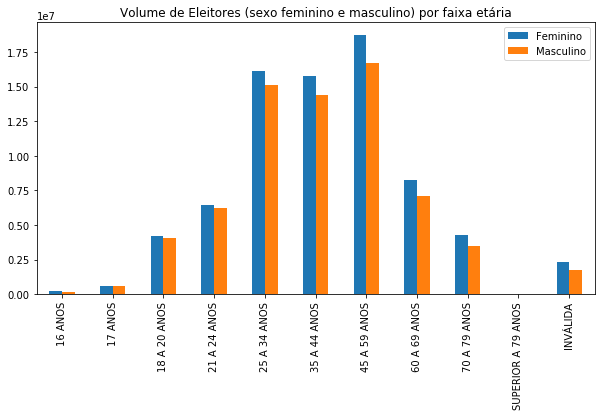

In [164]:
df = pd.DataFrame(data=data_plot, columns=['Feminino', 'Masculino'])
df.plot(kind = 'bar', title = 'Volume de Eleitores (sexo feminino e masculino) por faixa etária', figsize = (10,5), grid = False).set_xticklabels(legendas_faixaetaria)

In [160]:
# help(pd.DataFrame.plot)

####  Construção do gráfico do perfil eleitorado por UF:

In [165]:
# encontrandos as UF's e colocando em ordem alfabética:
ufs = perfil_eleitorado['UF'].unique()
ufs.sort()
ufs

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO', 'ZZ'], dtype=object)

In [166]:
# Usando groupby junto com o metodo sum para obter os valores absolutos de eleitores por genero e UF:
new_data2 = masc_e_fem.groupby(['UF', 'SEXO']).sum()['QNT_ELEITORES']

#Agora, um formato adequado para plotar o gráfico:
vetor2 = np.array(new_data2)
data_plot2 = vetor2.reshape(28,2)

[Text(0,0,'AC'),
 Text(0,0,'AL'),
 Text(0,0,'AM'),
 Text(0,0,'AP'),
 Text(0,0,'BA'),
 Text(0,0,'CE'),
 Text(0,0,'DF'),
 Text(0,0,'ES'),
 Text(0,0,'GO'),
 Text(0,0,'MA'),
 Text(0,0,'MG'),
 Text(0,0,'MS'),
 Text(0,0,'MT'),
 Text(0,0,'PA'),
 Text(0,0,'PB'),
 Text(0,0,'PE'),
 Text(0,0,'PI'),
 Text(0,0,'PR'),
 Text(0,0,'RJ'),
 Text(0,0,'RN'),
 Text(0,0,'RO'),
 Text(0,0,'RR'),
 Text(0,0,'RS'),
 Text(0,0,'SC'),
 Text(0,0,'SE'),
 Text(0,0,'SP'),
 Text(0,0,'TO'),
 Text(0,0,'ZZ')]

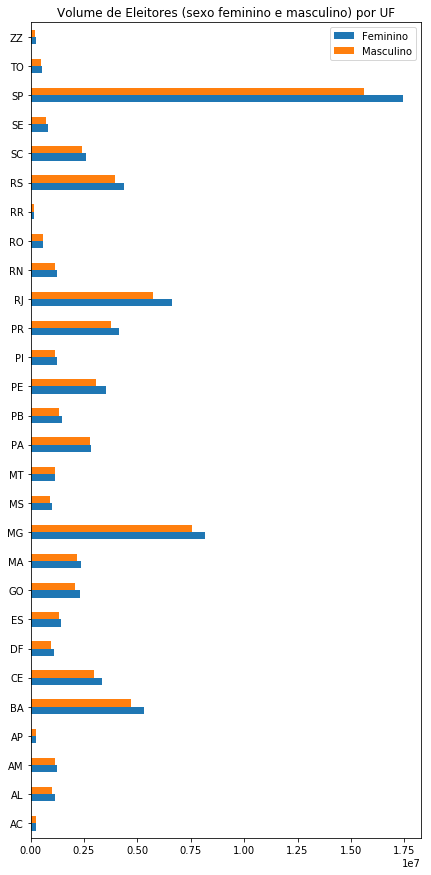

In [167]:
df = pd.DataFrame(data=data_plot2, columns=['Feminino', 'Masculino'])
df.plot(kind = 'barh', title = 'Volume de Eleitores (sexo feminino e masculino) por UF', figsize = (7,15), grid = False).set_yticklabels(ufs)

####  Construção do gráfico do perfil eleitorado por Escolaridade:

In [168]:
#Obtendo as escolaridades e colocando em ordem alfabética:
escolaridade = perfil_eleitorado['GRAU_DE_INSTRUCAO'].unique()
escolaridade.sort()
escolaridade

array(['ANALFABETO', 'ENSINO FUNDAMENTAL COMPLETO',
       'ENSINO FUNDAMENTAL INCOMPLETO', 'ENSINO MÉDIO COMPLETO',
       'ENSINO MÉDIO INCOMPLETO', 'LÊ E ESCREVE', 'NÃO INFORMADO',
       'SUPERIOR COMPLETO', 'SUPERIOR INCOMPLETO'], dtype=object)

In [169]:
# Usando groupby junto com o metodo sum para obter os valores absolutos de eleitores por genero e  Escolaridade:
new_data3 = masc_e_fem.groupby(['GRAU_DE_INSTRUCAO', 'SEXO']).sum()['QNT_ELEITORES']

#Agora, um formato adequado para plotar o gráfico:
vetor3 = np.array(new_data3)
data_plot3 = vetor3.reshape(9,2)

[Text(0,0,'ANALFABETO'),
 Text(0,0,'ENSINO FUNDAMENTAL COMPLETO'),
 Text(0,0,'ENSINO FUNDAMENTAL INCOMPLETO'),
 Text(0,0,'ENSINO MÉDIO COMPLETO'),
 Text(0,0,'ENSINO MÉDIO INCOMPLETO'),
 Text(0,0,'LÊ E ESCREVE'),
 Text(0,0,'NÃO INFORMADO'),
 Text(0,0,'SUPERIOR COMPLETO'),
 Text(0,0,'SUPERIOR INCOMPLETO')]

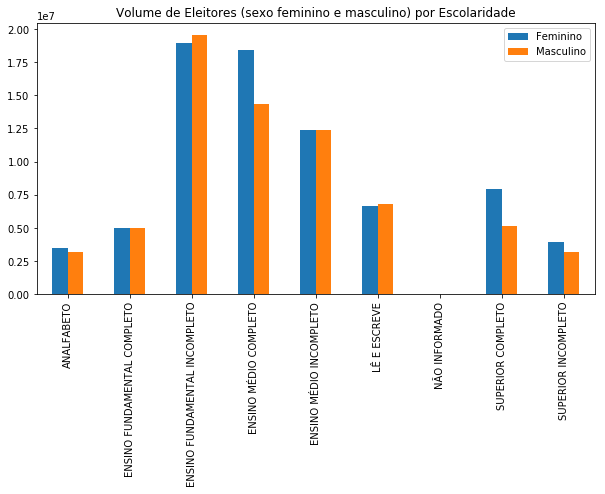

In [170]:
df = pd.DataFrame(data=data_plot3, columns=['Feminino', 'Masculino'])
df.plot(kind = 'bar', title = 'Volume de Eleitores (sexo feminino e masculino) por Escolaridade', figsize = (10,5), grid = False).set_xticklabels(escolaridade)